## Checkpoint 1 Data Cleaning 1

Load the companies and rounds data (provided on the previous page) into two data frames and name them companies and rounds2 respectively.

In [8]:
#load companies dataset 
import pandas as pd
import numpy as np

companies = pd.read_csv("investment_data/companies.csv",encoding = "ISO-8859-1")
companies.head()

permalink               name  \
0                  /Organization/-Fame              #fame   
1               /Organization/-Qounter           :Qounter   
2  /Organization/-The-One-Of-Them-Inc-  (THE) ONE of THEM   
3                /Organization/0-6-Com            0-6.com   
4       /Organization/004-Technologies   004 Technologies   

                        homepage_url  \
0                 http://livfame.com   
1             http://www.qounter.com   
2                                NaN   
3                 http://www.0-6.com   
4  http://004gmbh.de/en/004-interact   

                                       category_list     status country_code  \
0                                              Media  operating          IND   
1  Application Platforms|Real Time|Social Network...  operating          USA   
2                                                NaN        NaN          NaN   
3                                        Curated Web  operating          CHN   
4                                           Software  operating          USA   

  state_code       region           city  founded_at  
0         16       Mumbai         Mumbai         NaN  
1         DE   DE - Other  Delaware City  04-09-2014  
2        NaN          NaN            NaN         NaN  
3         22      Beijing        Beijing  01-01-2007  
4         IL  Springfield            NaN         NaN

In [118]:
# load rounds2 dataset 
rounds2 = pd.read_csv("investment_data/rounds2.csv",encoding = "ISO-8859-1")
rounds2.head()

company_permalink  \
0                  /organization/-fame   
1               /ORGANIZATION/-QOUNTER   
2               /organization/-qounter   
3  /ORGANIZATION/-THE-ONE-OF-THEM-INC-   
4                /organization/0-6-com   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
2  /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
3  /funding-round/650b8f704416801069bb178a1418776b            venture   
4  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   

  funding_round_code   funded_at  raised_amount_usd  
0                  B  05-01-2015        10000000.00  
1                  A  14-10-2014                nan  
2                NaN  01-03-2014          700000.00  
3                  B  30-01-2014         3406878.00  
4                  A  19-03-2008         2000000.00

### observed that these values are not case sensitive. 
### In order to get better results add column with lower case to join 2 datasets

In [124]:
companies['permalink_lower'] = companies['permalink'].str.lower()
rounds2['permalink_lower'] = rounds2['company_permalink'].str.lower()
rounds2['permalink_lower'].nunique()

66370

In [125]:
#number of unique values in companies
# this means its good to join on this column
companies['permalink_lower'].nunique() 

66349

Making a check if there are companies in rounds2 (funding received) that are not there in master list. And i find
that there are some. 
The number is not too high. For the moment these companies will be ignored in the join process. 

In [12]:
c1 = set(rounds2["permalink_lower"])
c2 = set(companies['permalink_lower'])
print (c1.difference(c2))

{'/organization/mvp-interactive', '/organization/mvp-draft-llc', '/organization/huizuche-com-æ\x83\xa0ç§ÿè½¦', '/organization/mvisible-technologies', '/organization/mvisum', '/organization/mwhs', '/organization/mverse', '/organization/zengame-ç¦\x85æ¸¸ç§\x91æ\x8a\x80', '/organization/energystone-games-ç\x81µç\x9f³æ¸¸æ\x88\x8f', '/organization/mvp-world-wide', '/organization/mx-orthopedics', '/organization/mwananchi-microfinance', '/organization/mvious-xotics', '/organization/mvno-dynamics-limited', '/organization/mx-2', '/organization/mwi', '/organization/mwm-media-workflow-management', '/organization/mx-logic', '/organization/tipcat-interactive-æ²\x99è\x88ÿä¿¡æ\x81¯ç§\x91æ\x9a\x80', '/organization/mwater', '/organization/mvp-vault', '/organization/mxbiodevices', '/organization/weiche-tech-å\x96\x82è½¦ç§\x91æ\x8a\x80', '/organization/magnet-tech-ç£\x81ç\x9f³ç§\x91æ\x8a\x80', '/organization/e-cã\x8abica', '/organization/mwr-infosecurity'}


## Merge two datasets into master frame

In [137]:
master_frame = pd.merge(companies, rounds2, how='inner', on=['permalink_lower'])
master_frame.head()

permalink               name  \
0                  /Organization/-Fame              #fame   
1               /Organization/-Qounter           :Qounter   
2               /Organization/-Qounter           :Qounter   
3  /Organization/-The-One-Of-Them-Inc-  (THE) ONE of THEM   
4                /Organization/0-6-Com            0-6.com   

             homepage_url                                      category_list  \
0      http://livfame.com                                              Media   
1  http://www.qounter.com  Application Platforms|Real Time|Social Network...   
2  http://www.qounter.com  Application Platforms|Real Time|Social Network...   
3                     NaN                                                NaN   
4      http://www.0-6.com                                        Curated Web   

      status country_code state_code      region           city  founded_at  \
0  operating          IND         16      Mumbai         Mumbai         NaN   
1  operating          USA         DE  DE - Other  Delaware City  04-09-2014   
2  operating          USA         DE  DE - Other  Delaware City  04-09-2014   
3        NaN          NaN        NaN         NaN            NaN         NaN   
4  operating          CHN         22     Beijing        Beijing  01-01-2007   

                       permalink_lower                    company_permalink  \
0                  /organization/-fame                  /organization/-fame   
1               /organization/-qounter               /ORGANIZATION/-QOUNTER   
2               /organization/-qounter               /organization/-qounter   
3  /organization/-the-one-of-them-inc-  /ORGANIZATION/-THE-ONE-OF-THEM-INC-   
4                /organization/0-6-com                /organization/0-6-com   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
2  /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
3  /funding-round/650b8f704416801069bb178a1418776b            venture   
4  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   

  funding_round_code   funded_at  raised_amount_usd  
0                  B  05-01-2015        10000000.00  
1                  A  14-10-2014                nan  
2                NaN  01-03-2014          700000.00  
3                  B  30-01-2014         3406878.00  
4                  A  19-03-2008         2000000.00

In [138]:
master_frame.info()
# to get number of observations in master_frame etc 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114919 entries, 0 to 114918
Data columns (total 17 columns):
permalink                  114919 non-null object
name                       114918 non-null object
homepage_url               107281 non-null object
category_list              109974 non-null object
status                     113309 non-null object
country_code               104837 non-null object
state_code                 102580 non-null object
region                     103356 non-null object
city                       99403 non-null object
founded_at                 89648 non-null object
permalink_lower            114919 non-null object
company_permalink          114919 non-null object
funding_round_permalink    114919 non-null object
funding_round_type         114919 non-null object
funding_round_code         31137 non-null object
funded_at                  114919 non-null object
raised_amount_usd          94938 non-null float64
dtypes: float64(1), object(16)
memory usag

## Checkpoint 2: Funding Type Analysis
### create dataframes having funding round type venture, Angel, seed and private equity respectively

In [139]:
venture = master_frame.loc[master_frame.funding_round_type == "venture"]

pd.options.display.float_format = '{:.2f}'.format
venture["raised_amount_usd"].describe()

count         50221.00
mean       11750339.12
std        86358003.08
min               0.00
25%         1602500.00
50%         5000000.00
75%        12000000.00
max     17600000000.00
Name: raised_amount_usd, dtype: float64

In [140]:
angel = master_frame.loc[master_frame.funding_round_type == "angel"]
angel["raised_amount_usd"].describe()

count        4858.00
mean       959049.43
std       7405900.77
min             0.00
25%        150000.00
50%        400000.00
75%       1000000.00
max     494511992.00
Name: raised_amount_usd, dtype: float64

In [141]:
seed = master_frame.loc[master_frame.funding_round_type == "seed"]
seed["raised_amount_usd"].describe()

count       23597.00
mean       719810.83
std       2221992.22
min             0.00
25%         55000.00
50%        275000.00
75%       1000000.00
max     200000000.00
Name: raised_amount_usd, dtype: float64

Venture has over 50 thousand entries with 11 million being the mean value. Seed is 23 thousand but avg value is too low. Not suitable for us. 
to check what is exact text for private equity

In [142]:
master_frame.funding_round_type.unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

In [143]:
pe = master_frame.loc[master_frame.funding_round_type == "private_equity"]
pe["raised_amount_usd"].describe()

count         1936.00
mean      73308593.03
std      198113458.41
min              0.00
25%        5000000.00
50%       20000000.00
75%       75000000.00
max     4745460219.00
Name: raised_amount_usd, dtype: float64

## Checkpoint 3: Country Analysis
#### Approach : Group by country code. Sort Values Descending by amount funding received. 
#### from these countries check in the wiki page which ones are english speaking

In [131]:
master_frame_by_country = master_frame.groupby('country_code')
master_frame_by_country
master_frame_by_country.raised_amount_usd.sum().sort_values(ascending = False)

country_code
USA   662150823715.00
CHN    75594156486.00
GBR    32762741334.00
IND    27686336560.00
CAN    18310463054.00
RUS    11271820120.00
DEU    10017763740.00
ISR     9688884650.00
FRA     9059770757.00
NLD     5966633238.00
JPN     4823767830.00
ESP     4727509439.00
CHE     4338976355.00
SWE     4079998943.00
SGP     4067832394.00
BRA     3948470295.00
AUS     3839236773.00
KOR     2827597227.00
IRL     2401610953.00
HKG     2294243554.00
DNK     1705432704.00
BEL     1668198549.00
NZL     1642834153.00
ARE     1570219065.00
NOR     1435937275.00
FIN     1281415890.00
MYS     1275523364.00
ITA     1150408194.00
ZAF     1074812080.00
BMU      977816000.00
            ...      
BHR         776269.00
ZMB         520000.00
KHM         480000.00
LKA         447240.00
SLV         440000.00
DZA         378812.00
AZE         374000.00
CMR         359561.00
BLM         350000.00
NPL         315000.00
DOM         288598.00
ALB         276744.00
RWA         271000.00
BLZ         200914.

#### from above found USA, GBR and IND as top 3 English speaking countries. 
#### In this part we will create 3 datasets one for each country. D1, D2, D3 (USA, GBR, IND Respectively) 

In [22]:
# Create a function to be applied
def top_three_country(x):
    return True if x in ['USA','GBR','IND'] else False 

# Create a new column
master_frame_top_3 = master_frame.loc[master_frame['country_code'].isin(['USA','GBR','IND']), :]
#master_frame_top_3 = master_frame['country_code'].apply(top_three_country)
master_frame_top_3.info()
master_frame_top_3.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 79206 entries, 0 to 114917
Data columns (total 17 columns):
permalink                  79206 non-null object
name                       79205 non-null object
homepage_url               75387 non-null object
category_list              78086 non-null object
status                     79206 non-null object
country_code               79206 non-null object
state_code                 78993 non-null object
region                     78758 non-null object
city                       74819 non-null object
founded_at                 64154 non-null object
permalink_lower            79206 non-null object
company_permalink          79206 non-null object
funding_round_permalink    79206 non-null object
funding_round_type         79206 non-null object
funding_round_code         22325 non-null object
funded_at                  79206 non-null object
raised_amount_usd          67611 non-null float64
dtypes: float64(1), object(16)
memory usage: 10.9+ MB


permalink              name  \
0             /Organization/-Fame             #fame   
1          /Organization/-Qounter          :Qounter   
2          /Organization/-Qounter          :Qounter   
5  /Organization/004-Technologies  004 Technologies   
9            /Organization/0Xdata            H2O.ai   

                        homepage_url  \
0                 http://livfame.com   
1             http://www.qounter.com   
2             http://www.qounter.com   
5  http://004gmbh.de/en/004-interact   
9                     http://h2o.ai/   

                                       category_list     status country_code  \
0                                              Media  operating          IND   
1  Application Platforms|Real Time|Social Network...  operating          USA   
2  Application Platforms|Real Time|Social Network...  operating          USA   
5                                           Software  operating          USA   
9                                          Analytics  operating          USA   

  state_code       region           city  founded_at  \
0         16       Mumbai         Mumbai         NaN   
1         DE   DE - Other  Delaware City  04-09-2014   
2         DE   DE - Other  Delaware City  04-09-2014   
5         IL  Springfield            NaN         NaN   
9         CA  SF Bay Area  Mountain View  01-01-2011   

                  permalink_lower               company_permalink  \
0             /organization/-fame             /organization/-fame   
1          /organization/-qounter          /ORGANIZATION/-QOUNTER   
2          /organization/-qounter          /organization/-qounter   
5  /organization/004-technologies  /ORGANIZATION/004-TECHNOLOGIES   
9            /organization/0xdata            /ORGANIZATION/0XDATA   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
2  /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
5  /funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830            venture   
9  /funding-round/383a9bd2c04f7038bb543ccef5ba3eae               seed   

  funding_round_code   funded_at  raised_amount_usd  
0                  B  05-01-2015        10000000.00  
1                  A  14-10-2014                nan  
2                NaN  01-03-2014          700000.00  
5                NaN  24-07-2014                nan  
9                NaN  22-05-2013         3000000.00

In [23]:
master_frame_top_3.pivot_table(values = 'raised_amount_usd', 
                      columns = 'country_code',                 
                      aggfunc = 'count')

country_code        GBR   IND    USA
raised_amount_usd  5016  1649  60946

### Checkpoint 4: Sector Analysis 1
#### Code for a merged data frame with each primary sector mapped to its main sector (the primary sector should be present in a separate column).
Approach: 
1. in master_frame add a column primary_category which has the first string before '|' in it. 
2. In mapping_df add a column indicating binary position of the category which it belongs to 
3. write a function (get_main_sector) that returns the main sector by given category 
4. append field 'main_sector' for master_frame 

In [144]:
# step 1: add primary_category by getting first element from pipe delimited string 
def get_first_category(category_list):
    return (category_list if pd.isnull(category_list) else category_list.split('|')[0])

master_frame['primary_sector'] = master_frame['category_list'].apply(get_first_category)
master_frame['primary_sector'].head()

0                    Media
1    Application Platforms
2    Application Platforms
3                      NaN
4              Curated Web
Name: primary_sector, dtype: object

In [150]:
# inspect mapping_df for list of columns
mapping = pd.read_csv("investment_data/mapping.csv",encoding = "ISO-8859-1")
mapping.head()

category_list  Automotive & Sports  Blanks  Cleantech / Semiconductors  \
0            NaN                    0       1                           0   
1             3D                    0       0                           0   
2    3D Printing                    0       0                           0   
3  3D Technology                    0       0                           0   
4     Accounting                    0       0                           0   

   Entertainment  Health  Manufacturing  News, Search and Messaging  Others  \
0              0       0              0                           0       0   
1              0       0              1                           0       0   
2              0       0              1                           0       0   
3              0       0              1                           0       0   
4              0       0              0                           0       0   

   Social, Finance, Analytics, Advertising  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        1

In [152]:
# append numeric field main_sector_bool to indicate which category it belongs to. 
mapping['main_sector_bool'] = mapping['Social, Finance, Analytics, Advertising'] + mapping['Others']*2 + \
mapping['News, Search and Messaging']*4 + mapping['Manufacturing']*8 + mapping['Health']*16 + mapping['Entertainment']*32 \
+ mapping['Cleantech / Semiconductors']*64 + mapping['Blanks']*128 + mapping['Automotive & Sports'] *256


def get_main_sector(sector_bool): 
    if sector_bool == 1:
        return "Social, Finance, Analytics, Advertising"
    elif sector_bool == 2:
        return "Others"
    elif sector_bool == 4:
        return "News, Search and Messaging"
    elif sector_bool == 8:
        return "Manufacturing"
    elif sector_bool == 16:
        return "Health"
    elif sector_bool == 32:
        return "Entertainment"
    elif sector_bool == 64:
        return "Cleantech / Semiconductors"
    elif sector_bool == 128:
        return "Blanks"
    elif sector_bool == 256:
        return "Automotive & Sports"
    else:
        return "multiple"
    
mapping['main_sector'] = mapping['main_sector_bool'].apply(get_main_sector)
# check if there are records with value 'multiple' if not then means all categories got assigned fine
mapping['main_sector'].unique()

array(['Blanks', 'Manufacturing',
       'Social, Finance, Analytics, Advertising', 'Health',
       'Automotive & Sports', 'Others', 'Cleantech / Semiconductors',
       'News, Search and Messaging', 'Entertainment'], dtype=object)

<font color=red>  _Text mentions that there are 8 main sectors including Others. But i see there are 9 here. Should we exclude 'Blank'. It makes sense but not mentioned explicitly._ </font>

#### Merging mapping (only category_list and main_sector columns) with master_frame

In [186]:
master_frame = pd.merge(master_frame, mapping[['category_list','main_sector']], how='inner', left_on=['primary_sector'] , right_on=['category_list'])
master_frame.head()

master_frame.to_csv('master_frame.csv') 

## Checkpoint 5: Sector Analysis 2

aim is to <font color=blue>_find out the most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD)_.</font>

- Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain:

    - All the columns of the master_frame along with the primary sector and the main sector

    - The total number (or count) of investments for each main sector in a separate column

    - The total amount invested in each main sector in a separate column

Using the three data frames, you can calculate the total number and amount of investments in each main sector.

__Result Expected__

Three data frames D1, D2 and D3 

Table 5.1: Based on the analysis of the sectors, which main sectors and countries would you recommend Spark Funds to invest in? Present your conclusions in the presentation. The conclusions are subjective (i.e. there may be no ‘one right answer’), but it should be based on the basic strategy — invest in sectors where most investments are occurring. 

In [209]:
pd.options.display.float_format = '{:.2f}'.format
D1 = master_frame.loc[(master_frame.country_code == 'USA') & (master_frame.funding_round_type == "venture") \
                       & (master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000), :]

D1.head()
#df.groupby('group').agg({'a':['sum', 'max'], 
#                         'b':'mean', 
#                         'c':'sum', 
#                         'd': lambda x: x.max() - x.min()})


TempDF= D1.groupby(by=['main_sector']).agg({'raised_amount_usd':['sum','count']})
TempDF= TempDF.reset_index() 
#TempDF.info()
TempDF['MillionsAsFloat'] = TempDF.apply(lambda row: row[('raised_amount_usd','sum')] / 1000000, axis=1)
TempDF.sort_values([('raised_amount_usd', 'sum'), ('raised_amount_usd', 'count')],ascending=[False,False])

#pt = D1.pivot_table(values = 'raised_amount_usd', 
#                      index = ['country_code','main_sector'],                 
#                      aggfunc = 'sum')

#pt = pt.sort_values(by=["raised_amount_usd"] ,ascending=[False])
#pt['MillionsAsFloat'] = pt.apply(lambda row: row['raised_amount_usd'] / 1000000, axis=1)
#pt

main_sector raised_amount_usd        \
                                                         sum count   
7                                   Others    25856148782.00  2895   
2               Cleantech / Semiconductors    20874190571.00  2270   
8  Social, Finance, Analytics, Advertising    16245800240.00  1860   
6               News, Search and Messaging    13646491094.00  1546   
4                                   Health     8066090751.00   894   
5                            Manufacturing     7144111760.00   788   
3                            Entertainment     4990212982.00   579   
0                      Automotive & Sports     1454104361.00   167   
1                                   Blanks      758463292.00    85   

  MillionsAsFloat  
                   
7        25856.15  
2        20874.19  
8        16245.80  
6        13646.49  
4         8066.09  
5         7144.11  
3         4990.21  
0         1454.10  
1          758.46

Merge two DFs into one adding grouped values at each row level. 
- D1 has all columns of master_frame
- It is filtered by country, fund type, only 5M to 15M funds
- It has aggregated fields, total number of investments per sector and total investment 

In [224]:
D1=pd.merge(D1, TempDF, how='inner', on='main_sector')
D1.head()
D1.info() #gets count of investments 
D1['raised_amount_usd_x'].sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11084 entries, 0 to 11083
Data columns (total 36 columns):
permalink                           11084 non-null object
name                                11084 non-null object
homepage_url                        10520 non-null object
category_list_x                     10999 non-null object
status                              11084 non-null object
country_code                        11084 non-null object
state_code                          11082 non-null object
region                              11075 non-null object
city                                10564 non-null object
founded_at                          9017 non-null object
permalink_lower                     11084 non-null object
company_permalink                   11084 non-null object
funding_round_permalink             11084 non-null object
funding_round_type                  11084 non-null object
funding_round_code                  7833 non-null object
funded_at              

99035613833.0

#### Repeat same steps for D2 and D3

In [226]:
pd.options.display.float_format = '{:.2f}'.format
D2 = master_frame.loc[(master_frame.country_code == 'GBR') & (master_frame.funding_round_type == "venture") \
                       & (master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000), :]

D2.head()

TempD2= D2.groupby(by=['main_sector']).agg({'raised_amount_usd':['sum','count']})
TempD2= TempD2.reset_index() 
TempD2['MillionsAsFloat'] = TempD2.apply(lambda row: row[('raised_amount_usd','sum')] / 1000000, axis=1)
TempD2.sort_values([('raised_amount_usd', 'sum'), ('raised_amount_usd', 'count')],ascending=[False,False])

D2=pd.merge(D2, TempD2, how='inner', on='main_sector')
D2.head()
D2.info()
D2['raised_amount_usd'].sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 0 to 583
Data columns (total 27 columns):
permalink                     584 non-null object
name                          584 non-null object
homepage_url                  555 non-null object
category_list_x               577 non-null object
status                        584 non-null object
country_code                  584 non-null object
state_code                    569 non-null object
region                        554 non-null object
city                          554 non-null object
founded_at                    462 non-null object
permalink_lower               584 non-null object
company_permalink             584 non-null object
funding_round_permalink       584 non-null object
funding_round_type            584 non-null object
funding_round_code            360 non-null object
funded_at                     584 non-null object
raised_amount_usd             584 non-null float64
primary_sector                577 non-null o

5086469206.0

#### Repeat for India D3

In [333]:
pd.options.display.float_format = '{:.2f}'.format
D3 = master_frame.loc[(master_frame.country_code == 'IND') & (master_frame.funding_round_type == "venture") \
                       & (master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000), :]

D3.head()

TempD3= D3.groupby(by=['main_sector']).agg({'raised_amount_usd':['sum','count']})
TempD3= TempD3.reset_index() 
TempD3['MillionsAsFloat'] = TempD3.apply(lambda row: row[('raised_amount_usd','sum')] / 1000000, axis=1)
TempD3.sort_values([('raised_amount_usd', 'sum'), ('raised_amount_usd', 'count')],ascending=[False,False])

D3.info()
D3['raised_amount_usd'].sum()
type(TempD3)
#D3=pd.merge(D3, TempD3, how='inner', on='main_sector')
#D3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 106673
Data columns (total 24 columns):
permalink                  301 non-null object
name                       301 non-null object
homepage_url               299 non-null object
category_list_x            299 non-null object
status                     301 non-null object
country_code               301 non-null object
state_code                 300 non-null object
region                     300 non-null object
city                       300 non-null object
founded_at                 257 non-null object
permalink_lower            301 non-null object
company_permalink          301 non-null object
funding_round_permalink    301 non-null object
funding_round_type         301 non-null object
funding_round_code         211 non-null object
funded_at                  301 non-null object
raised_amount_usd          301 non-null float64
primary_sector             299 non-null object
category_list_y            299 non-null objec

pandas.core.frame.DataFrame

In [229]:
# to get top sector
TempDF.sort_values([('raised_amount_usd', 'sum'), ('raised_amount_usd', 'count')],ascending=[False,False])

main_sector raised_amount_usd        \
                                                         sum count   
7                                   Others    25856148782.00  2895   
2               Cleantech / Semiconductors    20874190571.00  2270   
8  Social, Finance, Analytics, Advertising    16245800240.00  1860   
6               News, Search and Messaging    13646491094.00  1546   
4                                   Health     8066090751.00   894   
5                            Manufacturing     7144111760.00   788   
3                            Entertainment     4990212982.00   579   
0                      Automotive & Sports     1454104361.00   167   
1                                   Blanks      758463292.00    85   

  MillionsAsFloat  
                   
7        25856.15  
2        20874.19  
8        16245.80  
6        13646.49  
4         8066.09  
5         7144.11  
3         4990.21  
0         1454.10  
1          758.46

In [230]:
TempD2.sort_values([('raised_amount_usd', 'sum'), ('raised_amount_usd', 'count')],ascending=[False,False])

main_sector raised_amount_usd        \
                                                         sum count   
7                                   Others     1249124289.00   143   
2               Cleantech / Semiconductors     1136905008.00   127   
8  Social, Finance, Analytics, Advertising      821888357.00    98   
6               News, Search and Messaging      615746235.00    73   
3                            Entertainment      461511059.00    54   
5                            Manufacturing      361940335.00    42   
4                                   Health      214537510.00    24   
0                      Automotive & Sports      167051565.00    16   
1                                   Blanks       57764848.00     7   

  MillionsAsFloat  
                   
7         1249.12  
2         1136.91  
8          821.89  
6          615.75  
3          461.51  
5          361.94  
4          214.54  
0          167.05  
1           57.76

In [231]:
TempD3.sort_values([('raised_amount_usd', 'sum'), ('raised_amount_usd', 'count')],ascending=[False,False])

main_sector raised_amount_usd        \
                                                         sum count   
7                                   Others     1007409507.00   109   
6               News, Search and Messaging      433834545.00    52   
8  Social, Finance, Analytics, Advertising      290543500.00    32   
3                            Entertainment      280830000.00    33   
5                            Manufacturing      200900000.00    21   
4                                   Health      167740000.00    19   
2               Cleantech / Semiconductors      165380000.00    20   
0                      Automotive & Sports      136900000.00    13   
1                                   Blanks       27000000.00     2   

  MillionsAsFloat  
                   
7         1007.41  
6          433.83  
8          290.54  
3          280.83  
5          200.90  
4          167.74  
2          165.38  
0          136.90  
1           27.00

#### get company which received highest investment under Others 

In [571]:
D1.loc[D1.main_sector == 'Others'].groupby(by=['permalink','main_sector']).raised_amount_usd_x.sum().sort_values(ascending=False)

permalink                                      main_sector
/Organization/Virtustream                      Others        64300000.00
/Organization/Capella                          Others        54968051.00
/Organization/Airtight-Networks                Others        54201907.00
/Organization/Decarta                          Others        52100000.00
/Organization/Black-Duck-Software              Others        51000000.00
/Organization/Approva                          Others        50100000.00
/Organization/Five9                            Others        49600000.00
/Organization/Bit9                             Others        48433533.00
/Organization/Aryaka-Networks                  Others        48166500.00
/Organization/Bti-Systems                      Others        48000000.00
/Organization/Change-Healthcare                Others        47000000.00
/Organization/Zilliant                         Others        45600000.00
/Organization/Vormetric                        Others        4500

#### repeat same for D2 / D3

In [243]:
D2.loc[D2.main_sector == 'Others'].groupby(by=['permalink','main_sector']).raised_amount_usd.sum().sort_values(ascending=False)

permalink                                   main_sector
/Organization/Electric-Cloud                Others        37000000.00
/Organization/Sensage                       Others        36250000.00
/Organization/Enigmatic                     Others        32500000.00
/Organization/Silverrail-Technologies       Others        29000000.00
/Organization/Opencloud                     Others        27972766.00
/Organization/Myoptique-Group               Others        27694613.00
/Organization/Notonthehighstreet            Others        26900000.00
/Organization/Acs-Clothing                  Others        26239014.00
/Organization/Tribold                       Others        26000000.00
/Organization/Ip-Access                     Others        25000000.00
/Organization/Eglue-Business-Technologies   Others        22000000.00
/Organization/Aepona                        Others        20000000.00
/Organization/Lyst                          Others        19000000.00
/Organization/Njini               

In [244]:
D3.loc[D3.main_sector == 'Others'].groupby(by=['permalink','main_sector']).raised_amount_usd.sum().sort_values(ascending=False)

permalink                                                                             main_sector
/Organization/Firstcry-Com                                                            Others        39000000.00
/Organization/Myntra                                                                  Others        38000000.00
/Organization/Commonfloor                                                             Others        32900000.00
/Organization/Pepperfry-Com                                                           Others        28000000.00
/Organization/Itzcash-Card-Ltd                                                        Others        25000000.00
/Organization/Nxtgen-Data-Center-Cloud-Services                                       Others        22300000.00
/Organization/Maharana-Infrastructure-And-Professional-Services-Private-Limited-Mips  Others        21600000.00
/Organization/Comat-Technologies                                                      Others        21000000.00
/Organ

#### repeat same for second top sector

In [247]:

D1.loc[D1.main_sector == 'Cleantech / Semiconductors'].groupby(by=['permalink','main_sector']).raised_amount_usd_x.sum().sort_values(ascending=False)

permalink                                      main_sector               
/Organization/Biodesix                         Cleantech / Semiconductors   75300000.00
/Organization/Tigo-Energy                      Cleantech / Semiconductors   68739496.00
/Organization/Forsight-Labs                    Cleantech / Semiconductors   61300001.00
/Organization/Rheonix                          Cleantech / Semiconductors   56124758.00
/Organization/Scienergy                        Cleantech / Semiconductors   55375423.00
/Organization/Alung-Technologies               Cleantech / Semiconductors   54110403.00
/Organization/Metabolon                        Cleantech / Semiconductors   52420551.00
/Organization/Stretch                          Cleantech / Semiconductors   52000000.00
/Organization/Irhythm                          Cleantech / Semiconductors   50500000.00
/Organization/Ocular-Therapeutix               Cleantech / Semiconductors   49500000.00
/Organization/Aviir                           

In [248]:

D2.loc[D2.main_sector == 'Cleantech / Semiconductors'].groupby(by=['permalink','main_sector']).raised_amount_usd.sum().sort_values(ascending=False)

permalink                                                                    main_sector               
/Organization/Eusa-Pharma                                                    Cleantech / Semiconductors   35600000.00
/Organization/Horizon-Discovery                                              Cleantech / Semiconductors   31353719.00
/Organization/F-Star-Biotechnologische-Forschungs-Und-Entwicklungsges-M-B-H  Cleantech / Semiconductors   29132906.00
/Organization/Elixent                                                        Cleantech / Semiconductors   25000000.00
/Organization/Takeda-Cambridge                                               Cleantech / Semiconductors   22340000.00
/Organization/Immune-Targeting-Systems                                       Cleantech / Semiconductors   20320961.00
/Organization/Plaxica                                                        Cleantech / Semiconductors   19940192.00
/Organization/I2O-Water                                               

In [249]:
D3.loc[D3.main_sector == 'News, Search and Messaging'].groupby(by=['permalink','main_sector']).raised_amount_usd.sum().sort_values(ascending=False)

permalink                                       main_sector               
/Organization/Gupshup-Technology-India-Pvt-Ltd  News, Search and Messaging   33000000.00
/Organization/Imimobile                         News, Search and Messaging   23000000.00
/Organization/Sms-Gupshup                       News, Search and Messaging   22000000.00
/Organization/Hike                              News, Search and Messaging   21000000.00
/Organization/Roadrunnr                         News, Search and Messaging   21000000.00
/Organization/Matrimony-Com                     News, Search and Messaging   20400000.00
/Organization/Guruji                            News, Search and Messaging   15000000.00
/Organization/Bluestone-Com                     News, Search and Messaging   15000000.00
/Organization/Mobile2Win-India                  News, Search and Messaging   15000000.00
/Organization/Quikr-India                       News, Search and Messaging   14000000.00
/Organization/Bharat-Matrimony     

### Checkpoint 6: Plots 
#### Starting some analysis. 
#### Create a graph that shows % of funding by each funding round type also showing average funding value for each

In [833]:
#Step 1: Prepare dataframe that has sum, count, average and pct values by each round type and percentage of funding in each

import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

#not used kept for reference only
#DF2 = master_frame.groupby(by=['funding_round_type']).agg({'raised_amount_usd':['sum','count']})
#a = ('raised_amount_usd','sum')
#b = ('raised_amount_usd','count')
#c = ('pct',)
#DF2['average_funding_value (in millions)'] = DF2.apply(lambda x : x[a]/(x[b]*1000000),axis=1)
#DF2['pct'] = DF2[a]*100/DF2[a].sum()
#DF2 = DF2.reset_index()

DF2 = pd.pivot_table(master_frame, 
                     values =['raised_amount_usd'],
                     index =['funding_round_type'], 
                     aggfunc = {'raised_amount_usd': [sum ,np.mean]}
                    )

# convert values to millions
DF2[('raised_amount_usd','mean')] = DF2[('raised_amount_usd','mean')]/1000000
DF2[('raised_amount_usd','sum')] = DF2[('raised_amount_usd','sum')]/1000000

# add pct column for later use in pie chart 
DF2['pct'] = DF2[('raised_amount_usd','sum')]*100/DF2[('raised_amount_usd','sum')].sum()
# convert pct to 2 decimals 
DF2['pct'] = DF2.apply(lambda x: (round(x['pct'],2)),axis=1)
DF2 = DF2.reset_index()
print(DF2)

       funding_round_type raised_amount_usd             pct
                                       mean       sum      
0                   angel              0.95   4250.01  0.46
1        convertible_note              1.51   2020.15  0.22
2          debt_financing             17.17 107473.32 11.53
3     equity_crowdfunding              0.55    621.27  0.07
4                   grant              4.50   8993.07  0.96
5   non_equity_assistance              0.41     28.77  0.00
6           post_ipo_debt            168.66  24792.99  2.66
7         post_ipo_equity             84.19  50008.26  5.36
8          private_equity             74.86 133920.03 14.37
9    product_crowdfunding              1.33    499.94  0.05
10       secondary_market             87.52   2363.08  0.25
11                   seed              0.71  15390.42  1.65
12            undisclosed             19.34  28548.28  3.06
13                venture             11.75 553227.95 59.35


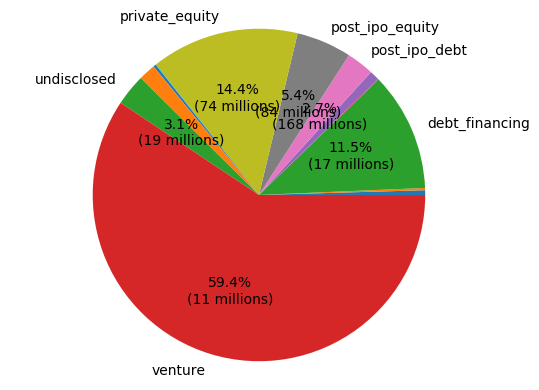

In [838]:
# Step 2: Now we will draw a pie chart with label as average value and % of contribution (default)
# for this purpose dynamic pct function is used. this function suppresses values for sectors less than 2 percent 
# for labels also a lambda function is written to suppress label for sectors less than 2 % contribution
# average value per sector is added to the pie chart 
def func(pct, df):
    pct = round(pct,2)
    value = int((df.loc[df.pct == pct][('raised_amount_usd','mean')].to_numpy())[0])
    return "{:.1f}%\n({:d} millions)".format(pct, value) if pct > 2 else ''

labels = DF2['funding_round_type'] # fund round type name 
labels = DF2.apply(lambda x: (x['funding_round_type'][0] if x['pct'].to_numpy() > 2.0 else '' ),axis=1)

sizes = DF2[a] # raised amount sum 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct=lambda pct: func(pct, DF2), shadow=False, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Plot 2: 
A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

y axis - country <br>
x axis - sum of investment for funding type vendure <br>
use dataframe which is filtered by funding type venture <br>
group by country <br>
restrict to top 9 only (need to find how to do) <br>
sort by investment <br>
plot in horizontal bar <br>

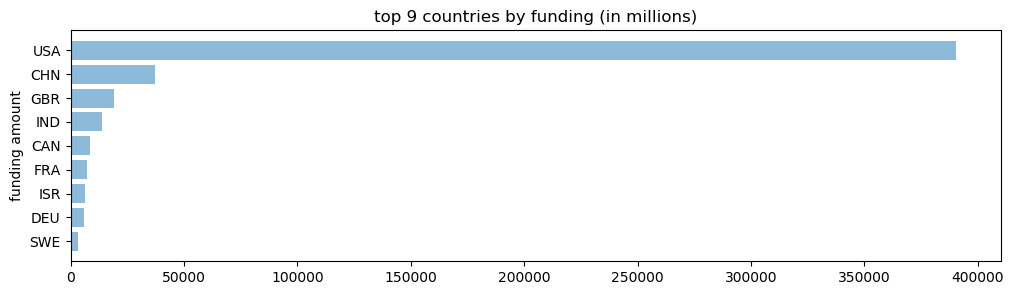

In [908]:
import matplotlib.pyplot as plt
venture = master_frame.loc[master_frame.funding_round_type == "venture"]
venture = venture.groupby(by=['country_code']).raised_amount_usd.sum()
venture = venture.apply(lambda x: x/1000000)
venture

venture = venture.sort_values(ascending=True)
venture = venture[-9:]
venture.reset_index()

fig, ax = plt.subplots(figsize=(12, 3))

ax.barh(venture.index, venture.values, alpha=0.5)
plt.ylabel('funding amount')
plt.title('top 9 countries by funding (in millions)')
plt.show()

Plot 3:
A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

multi bar chart ? <br> 
y axis - country1, 2 and 3 <br>
each bar having 3 sectors 

get data by top 3 countries <br> 
get data by top 3 sectors under each country <br>
plot it on multi bar graph <br>

In [906]:
#Step 1: Prepare the datasets. Get one data for each country . Get top 3 sectors from each. 

plot3_df = master_frame.loc[master_frame.funding_round_type == "venture"]
plot3_df = plot3_df.groupby(by=['country_code','main_sector']).raised_amount_usd.sum()
plot3_df = plot3_df.apply(lambda x: x/1000000)
plot3_df = plot3_df.to_frame().reset_index()


plot3_df1 = plot3_df.loc[plot3_df.country_code == 'USA']
plot3_df1 = plot3_df1.sort_values('raised_amount_usd',ascending=False)
plot3_df1 = plot3_df1[0:3]
plot3_df1

plot3_df2 = plot3_df.loc[plot3_df.country_code == 'GBR']
plot3_df2 = plot3_df2.sort_values('raised_amount_usd',ascending=False)
plot3_df2 = plot3_df2[0:3]
plot3_df2

plot3_df3 = plot3_df.loc[plot3_df.country_code == 'IND']
plot3_df3 = plot3_df3.sort_values('raised_amount_usd',ascending=False)
plot3_df3 = plot3_df3[0:3]
plot3_df3

plot3_df = pd.concat([plot3_df1, plot3_df2, plot3_df3]) 

# reduce the label sizes in order for better display 
plot3_df['main_sector'] = plot3_df.apply(lambda x: ('Clean..' if x['main_sector'] == 'Cleantech / Semiconductors' else x['main_sector']), axis=1) 
plot3_df['main_sector'] = plot3_df.apply(lambda x: ('Social..' if x['main_sector'] == 'Social, Finance, Analytics, Advertising' else x['main_sector']), axis=1)
plot3_df['main_sector'] = plot3_df.apply(lambda x: ('News..' if x['main_sector'] == 'News, Search and Messaging' else x['main_sector']), axis=1)
plot3_df['main_sector'] = plot3_df.apply(lambda x: ('Auto..' if x['main_sector'] == 'Automotive & Sports' else x['main_sector']), axis=1)
plot3_df['Country/Sector'] = plot3_df['main_sector'] + ',' + plot3_df['country_code'] 
plot3_df

# dataset is prepared now.

country_code main_sector  raised_amount_usd Country/Sector
475          USA     Clean..          117822.79    Clean..,USA
480          USA      Others           81159.93     Others,USA
481          USA    Social..           61186.42   Social..,USA
174          GBR     Clean..            5028.73    Clean..,GBR
179          GBR      Others            4400.42     Others,GBR
178          GBR      News..            2956.02     News..,GBR
220          IND      Others            6318.51     Others,IND
219          IND      News..            1739.58     News..,IND
213          IND      Auto..            1556.35     Auto..,IND

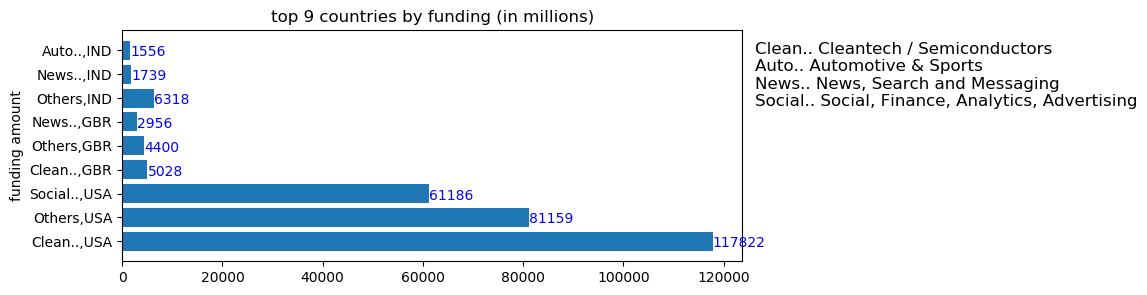

In [905]:
#Step 2: Draw the plot. A Bar chart. Each bar for country, main_sector combination. With values on top of it. 

fig, ax = plt.subplots(figsize=(8, 3))
ax.barh(plot3_df['Country/Sector'], plot3_df['raised_amount_usd'], alpha=1)
plt.ylabel('funding amount')
plt.title('top 9 countries by funding (in millions)')

# add a legend to give full name of the sector
textstr = 'Clean.. Cleantech / Semiconductors \n'
textstr = textstr + 'Auto.. Automotive & Sports \n'
textstr = textstr + 'News.. News, Search and Messaging \n'
textstr = textstr + 'Social.. Social, Finance, Analytics, Advertising'

for i, v in enumerate(plot3_df['raised_amount_usd']):
    ax.text(v + 3, i -.25 , str(int(v)), color='blue', fontweight=None)

ax.text(1.02, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=None)

plt.show()